In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn import tree
from xgboost import plot_tree

In [3]:
data = pd.read_csv("nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,01-01-1995,7.889470e+11,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,17,06-04-2017 08:36,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,01-01-1995,7.889470e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,21,06-04-2017 08:32,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,08-01-1995,7.895520e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,22,06-04-2017 09:20,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,15-01-1995,7.901570e+11,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,7,06-04-2017 09:15,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,15-01-1995,7.901570e+11,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,25,06-04-2017 08:57,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [4]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889470e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015570e+12,8.432865,30358.313370,18863.475325,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203060e+12,12.917889,46504.401180,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355560e+12,18.077649,65079.535410,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.018740,114294.420500,1.473320e+12,44.633747,160681.487900,99841.227830,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

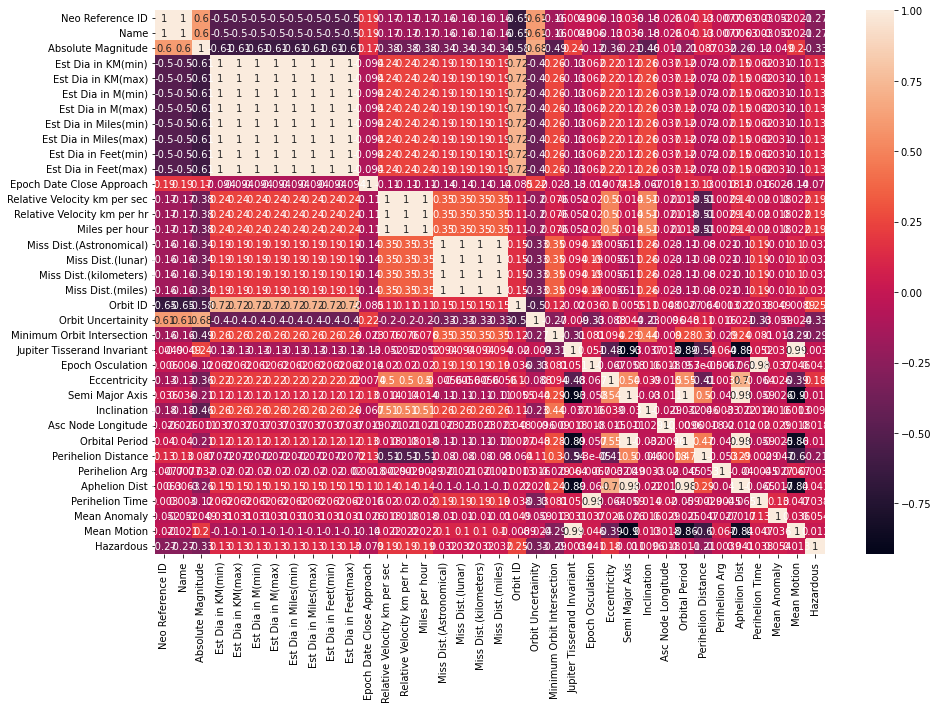

In [6]:
plt.figure(figsize=(15, 10))
corr=data.corr()
sns.heatmap(corr,annot=True)

<h2> As you can see in the heatmap above, there is a lot of similar data in the dataset. We have to exclude them.</h2>

In [7]:
data.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

# Data Preparation

In [8]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Hazardous"]) 
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Label
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,01-01-1995,7.889470e+11,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,17,06-04-2017 08:36,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,01-01-1995,7.889470e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,21,06-04-2017 08:32,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,08-01-1995,7.895520e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,22,06-04-2017 09:20,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,15-01-1995,7.901570e+11,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,7,06-04-2017 09:15,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,15-01-1995,7.901570e+11,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,25,06-04-2017 08:57,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True,1


In [9]:
data["Label"].value_counts()

0    3932
1     755
Name: Label, dtype: int64

In [10]:
categories = list(label_encoder.inverse_transform([0, 1]))
categories

[False, True]

In [11]:
classes = list(set(data["Hazardous"]))
data.drop(["Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Relative Velocity km per sec","Est Dia in M(max)","Relative Velocity km per hr","Est Dia in Feet(max)", "Est Dia in Feet(min)", "Est Dia in Miles(max)", "Est Dia in Miles(min)","Est Dia in KM(max)","Est Dia in KM(min)","Neo Reference ID","Orbit ID","Name","Close Approach Date","Equinox","Epoch Date Close Approach","Orbiting Body","Orbit Determination Date","Hazardous"], axis=1, inplace=True)

In [12]:
data.head()

,Absolute Magnitude,Est Dia in M(min),Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Label
0,21.6,127.219878,13680.50994,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,21.3,146.067964,40519.17311,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,20.3,231.502122,16979.66180,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,27.4,8.801465,24994.83986,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,21.6,127.219878,22012.95498,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


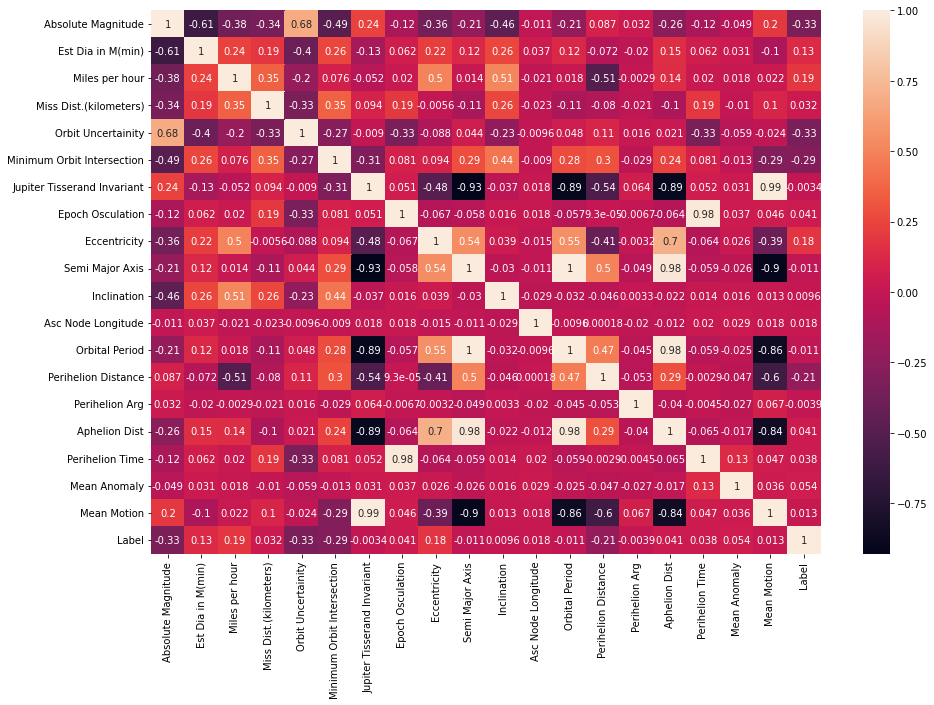

In [13]:
plt.figure(figsize=(15, 10))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [14]:
X, y = data.iloc[: , :-1], data.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes

In [15]:
nb_model = GaussianNB().fit(X_train,y_train)
print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",nb_model.score(X_test,y_test))

Accuracy of train: 0.949390243902439
Accuracy of test: 0.9438521677327647


In [16]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1153
           1       0.82      0.88      0.85       254

    accuracy                           0.94      1407
   macro avg       0.90      0.92      0.91      1407
weighted avg       0.95      0.94      0.94      1407



In [17]:
# Metrics
print("Precision = {}".format(precision_score(y_test, nb_model_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, nb_model_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, nb_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, nb_model_preds,average='macro')))

Precision = 0.8977947481939608
Recall = 0.9181611134254359
Accuracy = 0.9438521677327647
F1 Score = 0.9075054608999562


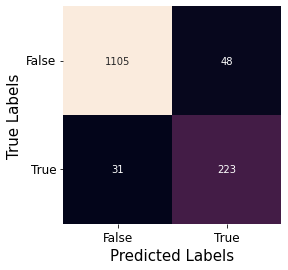

In [18]:
cm = confusion_matrix(y_test, nb_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Logistic Regression

In [19]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
print("Accuracy of train:",log_reg_model.score(X_train,y_train))
print("Accuracy of test:",log_reg_model.score(X_test,y_test))

Accuracy of train: 0.9524390243902439
Accuracy of test: 0.9481165600568585


In [20]:
#predictions
log_reg_preds = log_reg_model.predict(X_test)
print(classification_report(y_test,log_reg_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1153
           1       0.87      0.83      0.85       254

    accuracy                           0.95      1407
   macro avg       0.92      0.90      0.91      1407
weighted avg       0.95      0.95      0.95      1407



In [21]:
# Metrics
print("Precision = {}".format(precision_score(y_test, log_reg_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, log_reg_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, log_reg_preds)))
print("F1 Score = {}".format(f1_score(y_test, log_reg_preds,average='macro')))

Precision = 0.9181727546561453
Recall = 0.903879642971775
Accuracy = 0.9481165600568585
F1 Score = 0.9108062270906405


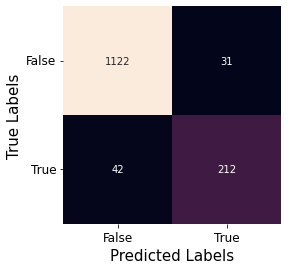

In [22]:
cm = confusion_matrix(y_test, log_reg_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Random Forest

In [23]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("Accuracy of train:",rf_model.score(X_train,y_train))
print("Accuracy of test:",rf_model.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9950248756218906


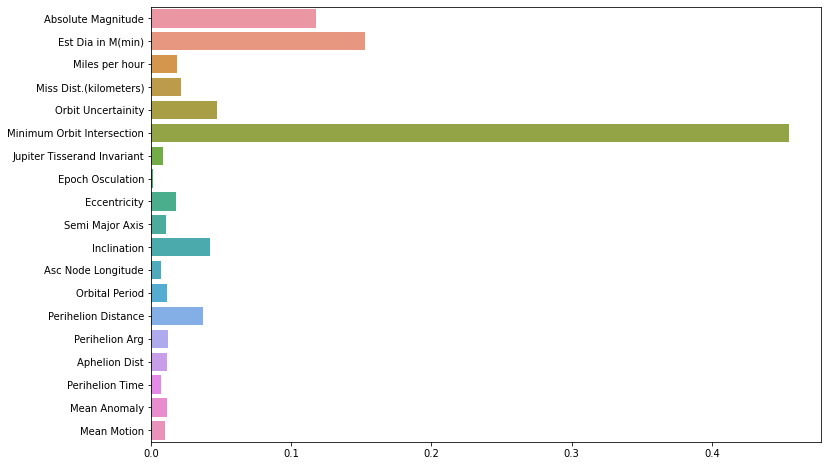

In [24]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.show()

In [25]:
#predictions
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test,rf_model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1153
           1       0.98      0.99      0.99       254

    accuracy                           1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [26]:
# Metrics
print("Precision = {}".format(precision_score(y_test, rf_model_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, rf_model_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, rf_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, rf_model_preds,average='macro')))

Precision = 0.9908547794117647
Recall = 0.9923598828116997
Accuracy = 0.9950248756218906
F1 Score = 0.991605333924287


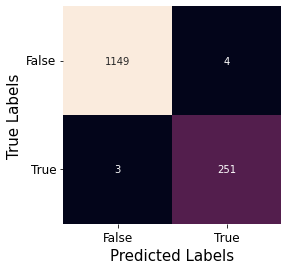

In [27]:
cm = confusion_matrix(y_test, rf_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Decision Tree

In [28]:
dec_tree = DecisionTreeClassifier().fit(X_train,y_train)
print("Accuracy of train:",dec_tree.score(X_train,y_train))
print("Accuracy of test:",dec_tree.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9936034115138592


[Text(556.4147727272727, 504.7714285714286, 'X[1] <= -0.24\ngini = 0.259\nsamples = 3280\nvalue = [2779, 501]'),
 Text(389.9659090909091, 427.11428571428576, 'X[1] <= -0.252\ngini = 0.009\nsamples = 1635\nvalue = [1628, 7]'),
 Text(285.3409090909091, 349.4571428571429, 'X[17] <= 1.672\ngini = 0.004\nsamples = 1607\nvalue = [1604, 3]'),
 Text(190.22727272727275, 271.8, 'X[1] <= -0.258\ngini = 0.002\nsamples = 1600\nvalue = [1598, 2]'),
 Text(114.13636363636364, 194.14285714285717, 'X[13] <= -1.568\ngini = 0.001\nsamples = 1566\nvalue = [1565, 1]'),
 Text(76.0909090909091, 116.48571428571432, 'X[13] <= -1.584\ngini = 0.037\nsamples = 53\nvalue = [52, 1]'),
 Text(38.04545454545455, 38.82857142857142, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(114.13636363636364, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(152.1818181818182, 116.48571428571432, 'gini = 0.0\nsamples = 1513\nvalue = [1513, 0]'),
 Text(266.3181818181818, 194.14285714285717, 'X[3] <= -1.562\ng

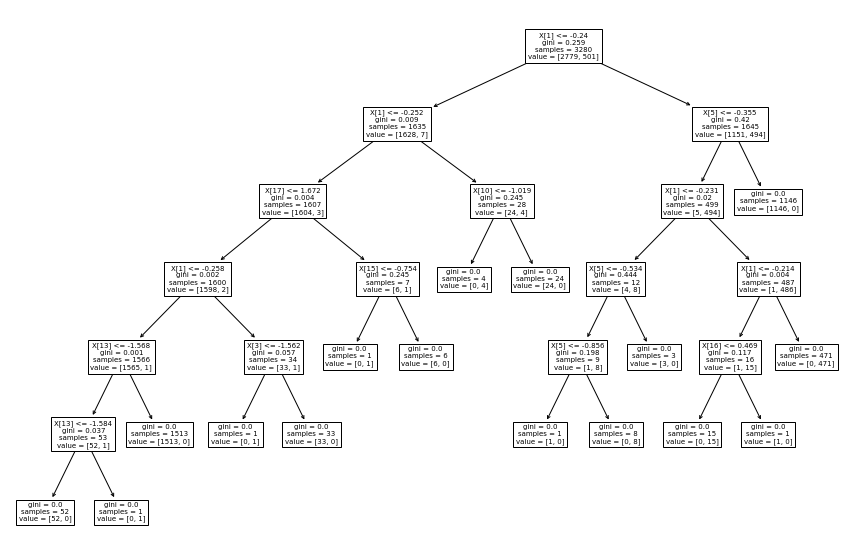

In [29]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dec_tree)

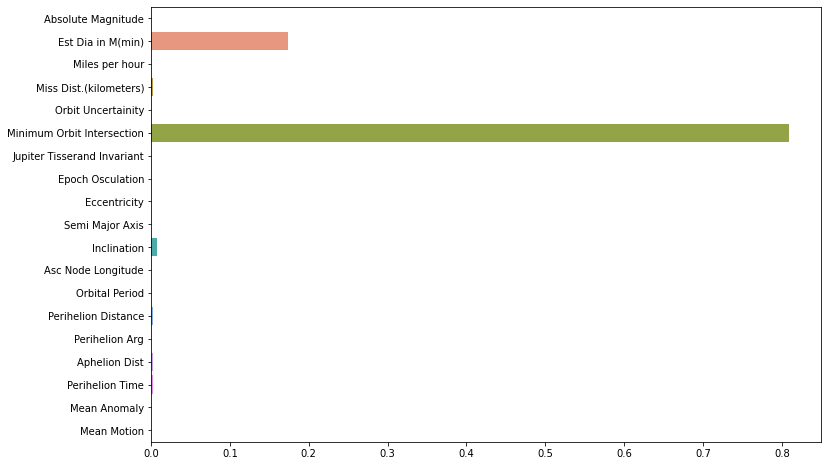

In [30]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=dec_tree.feature_importances_, y=X.columns)
plt.show()

In [31]:
#predictions
dec_tree_preds = dec_tree.predict(X_test)
print(classification_report(y_test,dec_tree_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1153
           1       0.98      0.98      0.98       254

    accuracy                           0.99      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       0.99      0.99      0.99      1407



In [32]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dec_tree_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, dec_tree_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dec_tree_preds)))
print("F1 Score = {}".format(f1_score(y_test, dec_tree_preds,average='macro')))

Precision = 0.9899284838437878
Recall = 0.988422874937684
Accuracy = 0.9936034115138592
F1 Score = 0.989173675179477


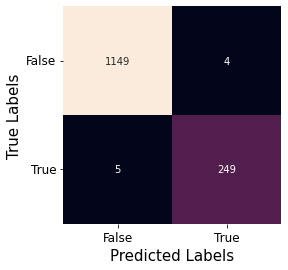

In [33]:
cm = confusion_matrix(y_test, dec_tree_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print("Accuracy of train:",knn.score(X_train,y_train))
print("Accuracy of test:",knn.score(X_test,y_test))

Accuracy of train: 0.913109756097561
Accuracy of test: 0.8905472636815921


In [35]:
#predictions
Knn_preds = knn.predict(X_test)
print(classification_report(y_test,Knn_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1153
           1       0.79      0.54      0.64       254

    accuracy                           0.89      1407
   macro avg       0.85      0.75      0.79      1407
weighted avg       0.88      0.89      0.88      1407



In [36]:
# Metrics
print("Precision = {}".format(precision_score(y_test, Knn_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, Knn_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, Knn_preds)))
print("F1 Score = {}".format(f1_score(y_test, Knn_preds,average='macro')))

Precision = 0.8462329054450877
Recall = 0.7536399396302695
Accuracy = 0.8905472636815921
F1 Score = 0.7878218737025171


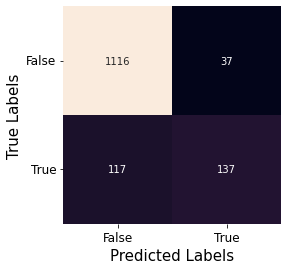

In [37]:
cm = confusion_matrix(y_test, Knn_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# SVM

In [38]:
svm = SVC(random_state=2)
svm.fit(X_train, y_train)
print("Accuracy of train:",svm.score(X_train,y_train))
print("Accuracy of test:",svm.score(X_test,y_test))

Accuracy of train: 0.961890243902439
Accuracy of test: 0.9402985074626866


In [39]:
#predictions
svm_preds = svm.predict(X_test)
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1153
           1       0.87      0.79      0.83       254

    accuracy                           0.94      1407
   macro avg       0.91      0.88      0.90      1407
weighted avg       0.94      0.94      0.94      1407



In [40]:
# Metrics
print("Precision = {}".format(precision_score(y_test, svm_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, svm_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, svm_preds)))
print("F1 Score = {}".format(f1_score(y_test, svm_preds,average='macro')))

Precision = 0.9106364636830522
Recall = 0.8822260996646885
Accuracy = 0.9402985074626866
F1 Score = 0.8955390098001782


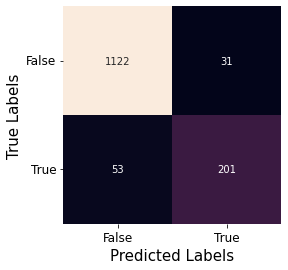

In [41]:
cm = confusion_matrix(y_test, svm_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Deep Learning

In [ ]:
dl_model = Sequential()
dl_model.add(Dense(20, activation='relu', input_shape=X_train.shape))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

In [ ]:
dl_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3280, 20)          400       
_________________________________________________________________
dense_1 (Dense)              (None, 3280, 50)          1050      
_________________________________________________________________
dense_2 (Dense)              (None, 3280, 50)          2550      
_________________________________________________________________
dense_3 (Dense)              (None, 3280, 1)           51        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
dl_model_history=dl_model.fit(X_train,y_train, epochs=100, batch_size=100, validation_data=(X_test,y_test))

Epoch 1/100
33/33 [==============================] - 0s 8ms/step - loss: 0.4874 - accuracy: 0.8287 - val_loss: 0.4353 - val_accuracy: 0.8280
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8436 - val_loss: 0.3633 - val_accuracy: 0.8280
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8436 - val_loss: 0.3106 - val_accuracy: 0.8280
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8561 - val_loss: 0.2525 - val_accuracy: 0.8806
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9040 - val_loss: 0.1984 - val_accuracy: 0.9104
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9314 - val_loss: 0.1547 - val_accuracy: 0.9325
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9470 - val_loss: 0.1346 - val_accuracy: 0.9417
Epoch 8/100
3

Epoch 59/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9837
Epoch 60/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9822
Epoch 61/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9822
Epoch 62/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9822
Epoch 63/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9808
Epoch 64/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 65/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0522 - val_accuracy: 0.9815
Epoch 

Text(0, 0.5, 'Accuracy')

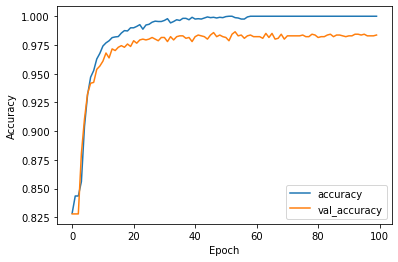

In [ ]:
plt.plot(dl_model_history.history['accuracy'])
plt.plot(dl_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

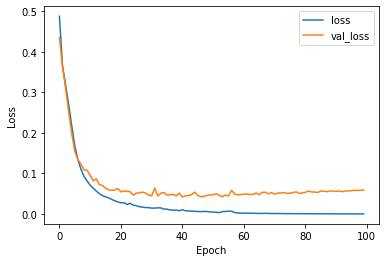

In [ ]:
plt.plot(dl_model_history.history['loss'])
plt.plot(dl_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
#predictions
dl_model_preds = dl_model.predict(X_test)
print(classification_report(y_test,dl_model_preds.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1165
           1       0.96      0.95      0.95       242

    accuracy                           0.98      1407
   macro avg       0.97      0.97      0.97      1407
weighted avg       0.98      0.98      0.98      1407



In [ ]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dl_model_preds.round(), average='macro')))
print("Recall = {}".format(recall_score(y_test, dl_model_preds.round(), average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dl_model_preds.round())))
print("F1 Score = {}".format(f1_score(y_test, dl_model_preds.round(),average='macro')))

Precision = 0.973514429414799
Recall = 0.9688486503742064
Accuracy = 0.9836531627576404
F1 Score = 0.9711622004806746


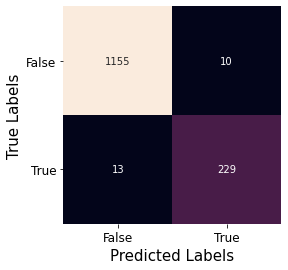

In [ ]:
cm = confusion_matrix(y_test, dl_model_preds.round())
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [42]:
accuracies={}
acc_n=accuracy_score(y_test, nb_model_preds)
accuracies['Naive Bayes'] = acc_n*100
acc_l=accuracy_score(y_test, log_reg_preds)
accuracies['Logistic Regression'] = acc_l*100
acc_r=accuracy_score(y_test, rf_model_preds)
accuracies['Random Forest'] = acc_r*100
acc_dt=accuracy_score(y_test, dec_tree_preds)
accuracies['Decision Tree'] = acc_dt*100
acc_knn=accuracy_score(y_test, Knn_preds)
accuracies['KNN'] = acc_knn*100
acc_svm=accuracy_score(y_test, svm_preds)
accuracies['SVM'] = acc_svm*100
acc_d=accuracy_score(y_test, dl_model_preds.round())
accuracies['Deep Learning'] = acc_d*100

In [44]:
#All Accuracies
Accuracies = pd.Series([acc_n, acc_l, acc_r, acc_dt, acc_knn, acc_svm,acc_d], 
                        index=['Naive_Bayes_accuracy','Logistic_Regression_accuracy', 'Random_Forest_accuracy', 'Decision_Tree_accuracy', 'KNN_accuracy', 'SVM_accuracy', 'Deep_Learning_accuracy']) 
Accuracies

Naive_Bayes_accuracy            0.943852
Logistic_Regression_accuracy    0.948117
Random_Forest_accuracy          0.995025
Decision_Tree_accuracy          0.993603
KNN_accuracy                    0.890547
SVM_accuracy                    0.940299
Deep_Learning_accuracy          0.983653
dtype: float64

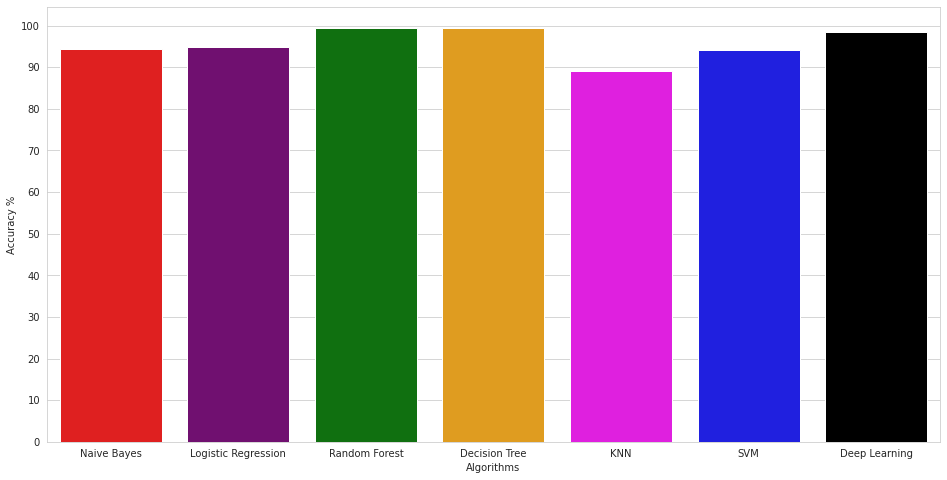

In [45]:
#Comparing Accuracies
colors = ["red","purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")#percent so multiply by 100
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()